<a href="https://colab.research.google.com/github/ravitata/tensorflow2/blob/master/wk2_first_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax

In [3]:
model = Sequential([
                    Flatten(input_shape=(28, 28), name='myflatlayer'),
                    Dense(16,activation='relu'),
                    Dense(16,activation='relu', name='myDense2'),
                    Dense(16,activation='tanh', name='mytanh'),
                    #Dense(10, activation='softmax'),
                    Dense(10),
                    Softmax(name='mysoftmax')
])

In [4]:
#model.weights
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
myflatlayer (Flatten)        (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
myDense2 (Dense)             (None, 16)                272       
_________________________________________________________________
mytanh (Dense)               (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
_________________________________________________________________
mysoftmax (Softmax)          (None, 10)                0         
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
____________________________________________________

In [5]:
print(784*16+16)
print(16*16+16)
print(16*10+10)

12560
272
170


In [6]:
n1=32  # input shape
f=16   #filter size
p=0   #padding
f=3   #no of filters (will be equal to no of channels in output)
s=1   #stride

n2 = (n1+2*p-f)/s + 1
print('Output shape=', n2)


Output shape= 30.0


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Softmax, Conv2D, MaxPooling2D

In [8]:
model = Sequential([
                    Conv2D(16, kernel_size=3,activation='relu', strides=1, padding='valid', input_shape=(28, 28, 1)),
                    MaxPooling2D(pool_size=3),
                    Flatten(),
                    Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [10]:
8*8*16

1024

In [11]:
model = Sequential([
                    Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)),
                    MaxPooling2D(pool_size=2),
                    Flatten(),
                    Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop', # adam, rmsprop, sgd, 
              loss='sparse_categorical_crossentropy',  #categorical_crossentropy
              metrics=['acc', 'mae'])

print(model.loss)
print(model.optimizer)
print(model.metrics_names)  #need to call fit before calling metrics_names


sparse_categorical_crossentropy
[]


### Instead of passing strings like above, we can pass Keras objects. It gives more flexibility as param can be passed

In [12]:
model = Sequential([
                    Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)),
                    MaxPooling2D(pool_size=2),
                    Flatten(),
                    Dense(10, activation='softmax')
])

opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
acc=[tf.keras.metrics.Accuracy(), tf.keras.metrics.MeanAbsoluteError()]

model.compile(optimizer= opt,
              loss= loss,
              metrics=acc)

print(model.loss)
print(model.optimizer)

In [13]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [14]:
print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [15]:
# Define the labels
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [16]:
print(train_labels[0])
print(labels[train_labels[0]])

9
Ankle boot


In [17]:
train_images = train_images/255.0
test_images = test_images/255.0

In [18]:
import matplotlib.pyplot as plt

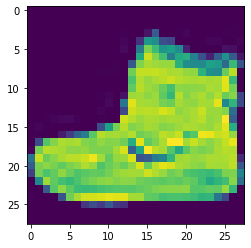

In [19]:
plt.imshow(train_images[0,:])

In [123]:
model = Sequential([
                    Conv2D(16, kernel_size=3,activation='relu', strides=1, padding='valid', input_shape=(28, 28, 1)),
                    MaxPooling2D(pool_size=3),
                    Conv2D(32, kernel_size=3,activation='relu', strides=1, padding='valid'),
                    MaxPooling2D(pool_size=3),
                    Flatten(),
                    Dense(10, activation='softmax')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc=tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer= opt, # adam, rmsprop, sgd, 
              loss='sparse_categorical_crossentropy',  #categorical_crossentropy
              metrics=[acc, mae])

In [124]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 32)          4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 6,090
Trainable params: 6,090
Non-trainable params: 0
____________________________________________________

In [125]:
import numpy as np
import pandas as pd

In [126]:
train_images1 = train_images[..., np.newaxis]
print(train_images1.shape)

(60000, 28, 28, 1)


In [127]:
hist=model.fit(train_images1, train_labels, epochs=10, batch_size=256, verbose = 2)

Epoch 1/10
235/235 - 1s - loss: 0.6774 - sparse_categorical_accuracy: 0.7630 - mean_absolute_error: 4.4200
Epoch 2/10
235/235 - 1s - loss: 0.4179 - sparse_categorical_accuracy: 0.8511 - mean_absolute_error: 4.4200
Epoch 3/10
235/235 - 1s - loss: 0.3666 - sparse_categorical_accuracy: 0.8690 - mean_absolute_error: 4.4200
Epoch 4/10
235/235 - 1s - loss: 0.3433 - sparse_categorical_accuracy: 0.8772 - mean_absolute_error: 4.4200
Epoch 5/10
235/235 - 1s - loss: 0.3288 - sparse_categorical_accuracy: 0.8831 - mean_absolute_error: 4.4200
Epoch 6/10
235/235 - 1s - loss: 0.3133 - sparse_categorical_accuracy: 0.8872 - mean_absolute_error: 4.4200
Epoch 7/10
235/235 - 1s - loss: 0.3007 - sparse_categorical_accuracy: 0.8913 - mean_absolute_error: 4.4200
Epoch 8/10
235/235 - 1s - loss: 0.2932 - sparse_categorical_accuracy: 0.8922 - mean_absolute_error: 4.4200
Epoch 9/10
235/235 - 1s - loss: 0.2848 - sparse_categorical_accuracy: 0.8973 - mean_absolute_error: 4.4200
Epoch 10/10
235/235 - 1s - loss: 0.28

In [128]:
df = pd.DataFrame(hist.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.677382,0.762967,4.420001
1,0.417948,0.851133,4.420001
2,0.366598,0.868950,4.420001
3,0.343260,0.877167,4.420000
4,0.328818,0.883067,4.419998


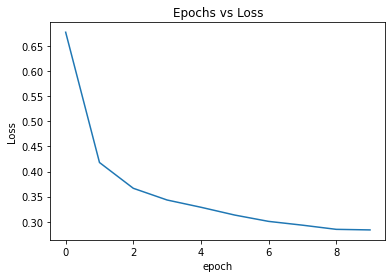

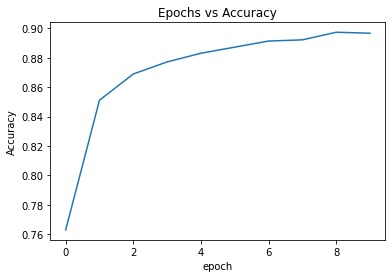

In [129]:
loss_plot = df.plot(y="loss", title = "Epochs vs Loss", legend=False, xlabel='epoch', ylabel='Loss')
acc_plot = df.plot(y="sparse_categorical_accuracy", title = "Epochs vs Accuracy", legend=False, xlabel='epoch', ylabel='Accuracy')

In [130]:
loss, sca, mae = model.evaluate(test_images[...,np.newaxis], test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3221 - sparse_categorical_accuracy: 0.8859 - mean_absolute_error: 4.4200


In [131]:
print(test_images.shape)
print(test_images[...,np.newaxis].shape)
print(test_labels.shape)

(10000, 28, 28)
(10000, 28, 28, 1)
(10000,)


In [132]:
print('loss = ', loss)
print('sparse_categorical_accuracy = ', sca)
print('mean_absolute_error = ', mae)

loss =  0.3221147656440735
sparse_categorical_accuracy =  0.8859000205993652
mean_absolute_error =  4.419997215270996


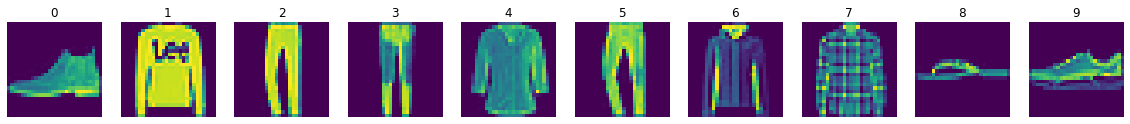

In [143]:
img = test_images[0:10, :]

#print(img.shape)
#plt.imshow(img[0])
#plt.show()

fig = plt.figure(figsize = (20, 10))
for x in range(0, img.shape[0]) :
  fig.add_subplot(2, 10, x+1)
  plt.imshow(img[x], aspect='equal')
  plt.title(x)
  plt.axis('off')
plt.show()
  

In [144]:
predictions=model.predict(img[...,np.newaxis])

#predictions=model.predict(img[...,np.newaxis])
#print(predictions.shape)
#print(np.argmax(predictions))
#print('Predicted = ',labels[test_labels[np.argmax(predictions)]])

for i in range(0, predictions.shape[0]):
  #print(np.argmax(predictions[i]))
  print(i, ' Predicted = ',labels[test_labels[np.argmax(predictions[i])]])


0  Predicted =  Sneaker
1  Predicted =  Trouser
2  Predicted =  Pullover
3  Predicted =  Pullover
4  Predicted =  Coat
5  Predicted =  Pullover
6  Predicted =  Shirt
7  Predicted =  Coat
8  Predicted =  Trouser
9  Predicted =  Shirt
